# Landmark Lower Bound Estimation

Here we show how we can try to estimate the lower bound for the number of landmarks that we would need in our analysis.

Load the necessary packages

In [2]:
import matplotlib.pyplot as plt
import scanpy as sc

import os.path as osp
import os
from PIL import Image

import anndata as ad
import pandas as pd
import sys

import eggplant as eg


In [3]:
N_REPS = 5
N_EVALS = 5
N_MIN_LMK = 1
N_MAX_LMK = 20

### Heart Data

In [4]:
HEART_PTH = "../../../data/human-developmental-heart/curated/V10F24-105_A1.h5ad"
adata = ad.read_h5ad(HEART_PTH)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


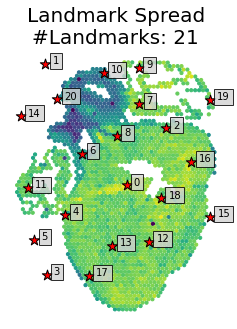

In [13]:
eg.pl.visualize_landmark_spread(adata, 
                                diameter_multiplier = 14,
                                marker_size = 10,
                                landmark_marker_size = 120,
                                seed = 1,
                               )
plt.show()

In [14]:
hrt_res = eg.fun.estimate_n_landmarks(dict(dhA = adata),
                                      n_max_lmks=N_MAX_LMK,
                                      n_min_lmks = N_MIN_LMK,
                                      n_reps = N_REPS,
                                      subsample = None,
                                      n_epochs=1000,
                                      n_evals= N_EVALS,
                                      device="gpu",
                                      verbose = True,
                                      diameter_multiplier= 14,
                                      seed = 1,
                                     )

[Processing] :: Sample : dhA (1/1)


/home/alma.andersson/miniconda3/envs/eggplant2/lib/python3.8/site-packages/eggplant-0.1-py3.8.egg/eggplant/models.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/alma.andersson/miniconda3/envs/eggplant2/lib/python3.8/site-packages/eggplant-0.1-py3.8.egg/eggplant/models.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Eval: 1 lmks | Rep: 1/5:   0%|                                                                                                | 0/1000 [00:00<?, ?it/s]/home/alma.andersson/miniconda3/envs/eggplant2/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [11], which does not match 

plot the results

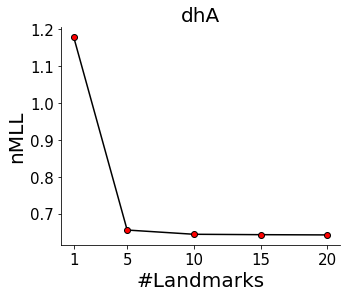

In [15]:
fig,ax = eg.pl.landmark_diagnostics(hrt_res,return_figures = True)

here it seems like $5$ is the lower bound, we can indicate this in the graph

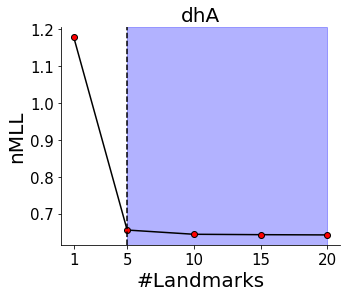

In [18]:
lower_bound = 5
eg.pl.landmark_diagnostics(hrt_res,lower_bound=lower_bound)